# nnUNET & 3D TransUNet 

## Installation

### apex

In [ ]:
!git clone https://github.com/NVIDIA/apex

In [ ]:
!cd /kaggle/working/apex && pip install -v --no-cache-dir  --no-build-isolation --global-option="--cpp_ext" --global-option="--cuda_ext" ./

By default, pip uses a feature called build isolation when installing packages. This feature is meant to ensure that the build dependencies specified by a package are met without affecting the global environment. It does this by creating a temporary isolated environment where it installs the build dependencies specified in the pyproject.toml file of the package. After building the package in this isolated environment, it installs the built package into the target environment.

When you use the --no-build-isolation flag, you are instructing pip to disable this build isolation mechanism

In [ ]:
import os
# !nvcc --version
base_dir = '/kaggle/working'
os.chdir(base_dir)

os.chdir('apex')
print("Current directory:", os.getcwd())

## added the flag --no-build-isolation to work 

!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" --no-build-isolation ./
os.chdir(base_dir)

In [12]:
print("Current directory:", os.getcwd())

Current directory: /kaggle/working


### 3D TransUNet

In [ ]:
!git clone https://github.com/Beckschen/3D-TransUNet.git

In [31]:
!pip install monai
!pip install matplotlib batchgenerators pandas SimpleITK medpy tqdm
!pip install segmentation_models_pytorch monai einops SimpleITK # installed
!pip install pyyaml einops adamp gco-wrapper medpy nibabel tensorboardX tqdm ml_collections # in arnold, but now installed in venv
!pip install fvcore
!pip install 'git+https://github.com/facebookresearch/detectron2.git'


#https://github.com/Beckschen/3D-TransUNet/issues/13

### nnUNet

In [15]:
!git clone https://github.com/prateekgupta891/nnUNet.git #my forked version

Cloning into 'nnUNet'...
remote: Enumerating objects: 3869, done.
remote: Total 3869 (delta 0), reused 0 (delta 0), pack-reused 3869 (from 1)
Receiving objects: 100% (3869/3869), 3.12 MiB | 27.81 MiB/s, done.
Resolving deltas: 100% (3092/3092), done.


#### Integrative?

In [32]:
pip install nnunet

### hidden layer

In [33]:
import os
base_dir = '/kaggle/working/'

respository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(respository_dir)

!pip install -e .
#(optional installation)
!pip install --upgrade git+https://github.com/nanohanno/hiddenlayer.git@bugfix/get_trace_graph#egg=hiddenlayer

os.chdir(base_dir)

### other

In [18]:
!pip install pyyaml

# Imports

In [34]:
#libraries
import shutil
from collections import OrderedDict
import json
import numpy as np
import os
#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib
import shutil
import SimpleITK as sitk

In [20]:
import os
base_dir = '/kaggle/working'
repository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(base_dir)    
print("Current directory:", os.getcwd())   

Current directory: /kaggle/working


In [21]:
if os.getcwd()==  base_dir:
    print('We are in the correct directory')
else:
    print("Run set base directory step again, then check to verify.") 

We are in the correct directory


# Util functions

In [22]:
import shutil
import os

def delete_folder(path):
    try:
        # Remove the directory and all its contents
        shutil.rmtree(path)
        print(f"Successfully deleted the folder: {path}")
    except FileNotFoundError:
        # Handle the case where the folder does not exist
        print(f"The folder {path} does not exist.")
    except Exception as e:
        # Handle other exceptions such as permission issues
        print(f"An error occurred: {e}")

# Example usage:
folder_path = '/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet//kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/dataset.json'  # Specify the path to the folder you want to delete
delete_folder(folder_path)


The folder /kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet//kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/dataset.json does not exist.


In [23]:
import os

def delete_file(file_path):
    try:
        # Remove the file
        os.remove(file_path)
        print(f"Successfully deleted the file: {file_path}")
    except FileNotFoundError:
        # Handle the case where the file does not exist
        print(f"The file {file_path} does not exist.")
    except PermissionError:
        # Handle permission errors
        print(f"Permission denied: cannot delete the file {file_path}.")
    except Exception as e:
        # Handle other exceptions such as OS errors
        print(f"An error occurred: {e}")

# Example usage:
file_path = '/kaggle/working/3D-TransUNet/scripts/train.sh'  # Replace with your actual file path
delete_file(file_path)


Successfully deleted the file: /kaggle/working/3D-TransUNet/scripts/train.sh


In [35]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f'{folder_path} exists.')
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")


In [36]:
import os
import glob

def subdirs(directory, prefix='', join=False):
    # Create a pattern that matches directories starting with the given prefix
    pattern = os.path.join(directory, prefix + '*')
    
    # Use glob to find all paths matching the pattern, filter to keep only directories
    all_subdirs = [path for path in glob.glob(pattern) if os.path.isdir(path)]
    
    # If join is False, return only the last component of each directory path
    if not join:
        return [os.path.basename(subdir) for subdir in all_subdirs]
    
    return all_subdirs

# Data Folders

In [37]:
task_name = 'Task180_BraTSMet' #change here for different task name
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

In [38]:
make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/imagesTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/labelsTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/imagesTs exists.
/kaggle/working/nnUNet/nnunet/nnunet_trained_models exists.


# Env Variables

In [39]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base')
os.environ['nnUNet_preprocessed'] = os.path.join(main_dir,'preprocessed')
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models')

In [40]:
print("nnUNet_raw_data_base:", os.environ['nnUNet_raw_data_base'])
print("nnUNet_preprocessed:", os.environ['nnUNet_preprocessed'])
print("RESULTS_FOLDER:", os.environ['RESULTS_FOLDER'])

nnUNet_raw_data_base: /kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base
nnUNet_preprocessed: /kaggle/working/nnUNet/nnunet/preprocessed
RESULTS_FOLDER: /kaggle/working/nnUNet/nnunet/nnUNet_trained_models


# Data Format Conversion

In [41]:
def subdirs(directory, prefix='', join=False):
    pattern = os.path.join(directory, prefix + '*')
    all_subdirs = [path for path in glob.glob(pattern) if os.path.isdir(path)]
    if not join:
        return [os.path.basename(subdir) for subdir in all_subdirs]
    return all_subdirs

def setup_nnunet_folders(training_dir, test_dir, task_id, task_name):
    nnunet_base = os.path.join(os.environ['nnUNet_raw_data_base'], f"nnUNet_raw_data/Task{task_id:03d}_{task_name}")
    imagesTr = os.path.join(nnunet_base, 'imagesTr')
    imagesTs = os.path.join(nnunet_base, 'imagesTs')
    labelsTr = os.path.join(nnunet_base, 'labelsTr')

    # Ensure directories exist
    os.makedirs(imagesTr, exist_ok=True)
    os.makedirs(imagesTs, exist_ok=True)
    os.makedirs(labelsTr, exist_ok=True)

    case_ids = subdirs(training_dir, prefix='BraTS', join=False)
    for c in case_ids:
        shutil.copy(os.path.join(training_dir, c, c + "-t1n.nii"), os.path.join(imagesTr, c + '_0000.nii'))
        shutil.copy(os.path.join(training_dir, c, c + "-t1c.nii"), os.path.join(imagesTr, c + '_0001.nii'))
        shutil.copy(os.path.join(training_dir, c, c + "-t2w.nii"), os.path.join(imagesTr, c + '_0002.nii'))
        shutil.copy(os.path.join(training_dir, c, c + "-t2f.nii"), os.path.join(imagesTr, c + '_0003.nii'))
        shutil.copy(os.path.join(training_dir, c, c + "-seg.nii"), os.path.join(labelsTr, c + '.nii'))

    test_ids = subdirs(test_dir, prefix='BraTS', join=False)
    for c in test_ids:
        shutil.copy(os.path.join(test_dir, c, c + "-t1n.nii"), os.path.join(imagesTs, c + '_0000.nii'))
        shutil.copy(os.path.join(test_dir, c, c + "-t1c.nii"), os.path.join(imagesTs, c + '_0001.nii'))
        shutil.copy(os.path.join(test_dir, c, c + "-t2w.nii"), os.path.join(imagesTs, c + '_0002.nii'))
        shutil.copy(os.path.join(test_dir, c, c + "-t2f.nii"), os.path.join(imagesTs, c + '_0003.nii'))

    # Additional function calls (e.g., generate_dataset_json) should be included here if needed

if __name__ == '__main__':
    training_dir = '/kaggle/input/sample-data-5-for-5-fold/sample_data/sample_train'
    testing_dir = '/kaggle/input/sample-data-5-for-5-fold/sample_data/sample_test'
    task_id = 180
    task_name = "BraTSMet"

    setup_nnunet_folders(training_dir, testing_dir, task_id, task_name)


In [43]:
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))


In [45]:
print("Testing files:",len(os.listdir(test_dir)))
print(test_dir)

### Compress again (Kaggle Env) x3

In [49]:
import os
import nibabel as nib

def compress_and_replace_nii(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.nii'):  # Ensures we only process .nii files
            file_path = os.path.join(directory, filename)
            compressed_file_path = file_path + '.gz'

            # Load the NIfTI file
            img = nib.load(file_path)
            
            # Save it as a compressed NIfTI file (.nii.gz)
            nib.save(img, compressed_file_path)

            # Verify if the new file exists and then remove the old file
            if os.path.exists(compressed_file_path):
                os.remove(file_path)
                print(f"Replaced {file_path} with {compressed_file_path}")
            else:
                print(f"Failed to create compressed file for {file_path}")

# Usage
directory_path = '/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/imagesTs' 
compress_and_replace_nii(directory_path)


In [51]:
#renaming to add the modality for SCGM there is only one modality 
#images should be added with 0000
#can be skipped if modality is already mentioned
#re-write for multiple modalities

def check_modality(filename):
    """
    check for the existence of modality
    return False if modality is not found else True
    """
    end = filename.find('.nii')
    modality = filename[end-4:end]
    for mod in modality: 
        if not(ord(mod)>=48 and ord(mod)<=57): #if not in 0 to 9 digits
            return False
    return True

def rename_for_single_modality(directory):
    
    for file in os.listdir(directory):
        
        if check_modality(file)==False:
            new_name = file[:file.find('.nii.gz')]+"_0000.nii.gz"
            os.rename(os.path.join(directory,file),os.path.join(directory,new_name))
            print(f"Renamed to {new_name}")
        else:
            print(f"Modality present: {file}")

rename_for_single_modality(train_image_dir)
rename_for_single_modality(test_dir)

# Generate dataset.json

In [52]:
from typing import Tuple
import os
import shutil
from glob import glob
import random
import numpy as np
import json

def get_identifiers_from_splitted_files(folder: str):
    # Collect all .nii.gz files in the folder
    file_paths = glob(os.path.join(folder, '*.nii.gz'))
    # Extract unique identifiers from the file paths
    uniques = np.unique([os.path.basename(f).split('_')[0] for f in file_paths])
    return uniques

def generate_dataset_json(output_file: str, imagesTr_dir: str, imagesTs_dir: str, modalities: Tuple,
                          labels: dict, dataset_name: str, sort_keys=True, license: str = "hands off!", dataset_description: str = "",
                          dataset_reference="", dataset_release='0.0'):
    """
    :param output_file: This needs to be the full path to the dataset.json you intend to write, so
    output_file='DATASET_PATH/dataset.json' where the folder DATASET_PATH points to is the one with the
    imagesTr and labelsTr subfolders
    :param imagesTr_dir: path to the imagesTr folder of that dataset
    :param imagesTs_dir: path to the imagesTs folder of that dataset. Can be None
    :param modalities: tuple of strings with modality names. must be in the same order as the images (first entry
    corresponds to _0000.nii.gz, etc). Example: ('T1', 'T2', 'FLAIR').
    :param labels: dict with int->str (key->value) mapping the label IDs to label names. Note that 0 is always
    supposed to be background! Example: {0: 'background', 1: 'edema', 2: 'enhancing tumor'}
    :param dataset_name: The name of the dataset. Can be anything you want
    :param sort_keys: In order to sort or not, the keys in dataset.json
    :param license:
    :param dataset_description:
    :param dataset_reference: website of the dataset, if available
    :param dataset_release:
    :return:
    """
    train_identifiers = get_identifiers_from_splitted_files(imagesTr_dir)

    if imagesTs_dir is not None:
        test_identifiers = get_identifiers_from_splitted_files(imagesTs_dir)
    else:
        test_identifiers = []

    json_dict = {}
    json_dict['name'] = dataset_name
    json_dict['description'] = dataset_description
    json_dict['tensorImageSize'] = "4D"
    json_dict['reference'] = dataset_reference
    json_dict['licence'] = license
    json_dict['release'] = dataset_release
    json_dict['modality'] = {str(i): modalities[i] for i in range(len(modalities))}
    json_dict['labels'] = {str(i): labels[i] for i in labels.keys()}

    json_dict['numTraining'] = len(train_identifiers)
    json_dict['numTest'] = len(test_identifiers)
    json_dict['training'] = [
        {'image': "./imagesTr/%s.nii.gz" % i, "label": "./labelsTr/%s.nii.gz" % i} for i
        in
        train_identifiers]
    json_dict['test'] = ["./imagesTs/%s.nii.gz" % i for i in test_identifiers]

    if not output_file.endswith("dataset.json"):
        print("WARNING: output file name is not dataset.json! This may be intentional or not. You decide. "
              "Proceeding anyways...")
        
    # Save the JSON dictionary to a file
    with open(output_file, 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=sort_keys)

# Modalities in the order of their appearance in the filenames
modalities = ('T1', 'T1ce', 'T2', 'Flair')

# Labels as specified by the BRATS challeng
labels = {
        "0": "background",
        "1": "edema",
        "2": "non-enhancing",
        "3": "enhancing",
    }

dataset_name = 'Task180_BraTSMet'

# Now call the function to generate dataset.json
generate_dataset_json(
    output_file=os.path.join("/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet", 'dataset.json'),
    imagesTr_dir="/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/imagesTr",
    imagesTs_dir="/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task180_BraTSMet/imagesTs",
    modalities=modalities,
    labels=labels,
    dataset_name=dataset_name,
    license='hehe',  
    dataset_description='BRATS Met Brain Tumour Segmentation Dataset',
    dataset_reference='http:..',
    dataset_release='1.0'
)


# Plan & Preprocess

In [54]:
#running it from the experiment_planning folder to verify the path settings
import os
os.chdir(main_dir)
!python /kaggle/working/nnUNet/nnunet/experiment_planning/nnUNet_plan_and_preprocess.py -t 180 --verify_dataset_integrity
os.chdir(base_dir)

# Data Visualization

(240, 240, 5) (240, 240, 5)


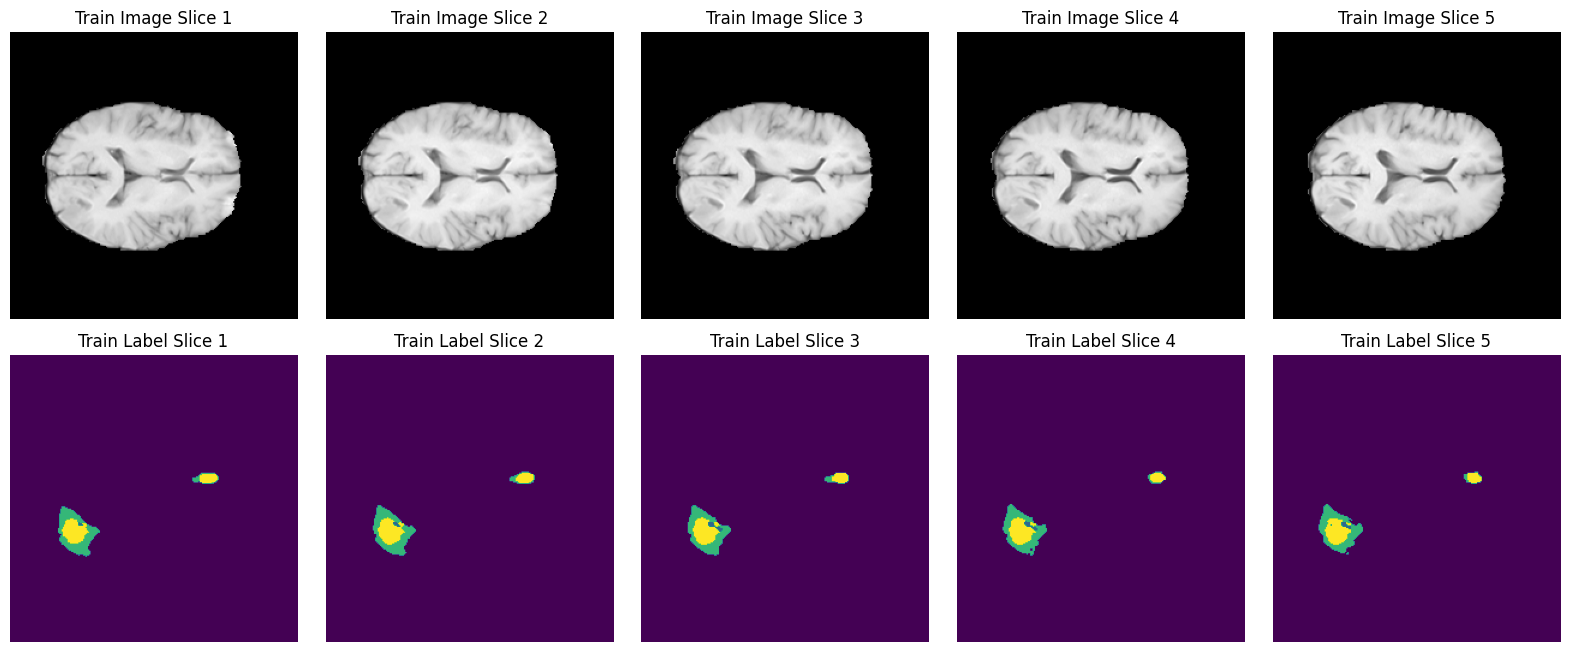

In [55]:
# Randomly pick an image file
train_img_name = os.listdir(train_image_dir)[np.random.randint(0, len(os.listdir(train_image_dir)))]
train_img_path = os.path.join(train_image_dir, train_img_name)
train_img = np.array(nib.load(train_img_path).dataobj)[0:,0:,75:80]

# Extract the base name from the image file, remove the modality suffix to get the label file name
base_name = train_img_name.rsplit('_', 1)[0]  # Splits at the last underscore and takes the first part
train_label_name = base_name + '.nii.gz'
train_label_path = os.path.join(train_label_dir, train_label_name)

# Load the label if the file exists
if os.path.exists(train_label_path):
    train_label = np.array(nib.load(train_label_path).dataobj)[0:,0:,75:80]
else:
    raise FileNotFoundError(f"No such file or no access: '{train_label_path}'")

print(train_img.shape, train_label.shape)

# Visualization setup
max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20, 8))
for idx in range(max_cols):
    axes[0, idx].axis("off")
    axes[0, idx].set_title(f'Train Image Slice {idx + 1}')
    axes[0, idx].imshow(train_img[:, :, idx], cmap="gray")

for idx in range(max_cols):
    axes[1, idx].axis("off")
    axes[1, idx].set_title(f'Train Label Slice {idx + 1}')
    axes[1, idx].imshow(train_label[:, :, idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()


(240, 240, 5)


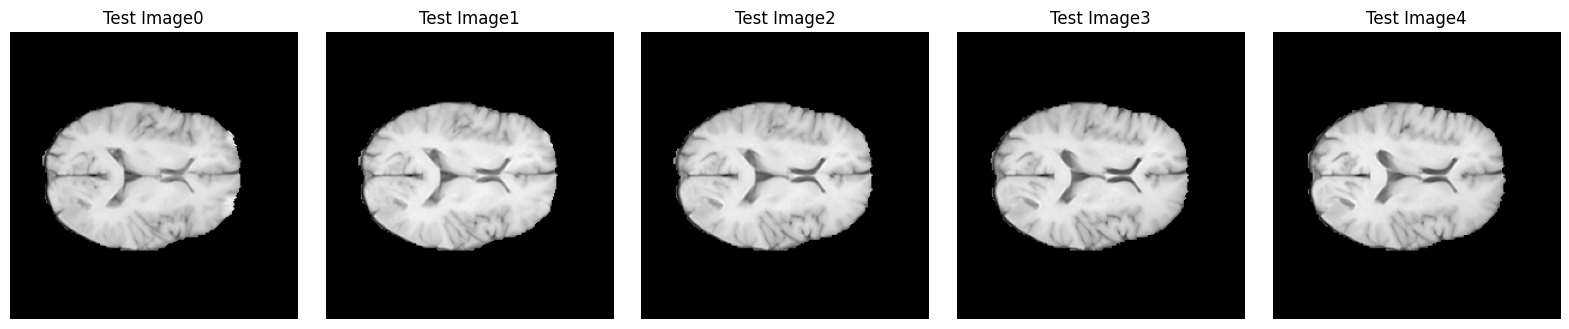

In [56]:

test_img_name = os.listdir(test_dir)[np.random.randint(0,1)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,75:80]

print(test_img.shape)

max_cols = test_img.shape[2]
max_rows = 1

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,20))
for idx in range(max_cols):
    axes[ idx].axis("off") 
    axes[ idx].set_title('Test Image'+str(idx))
    axes[ idx].imshow(test_img[:,:,idx], cmap="gray")
    
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()


In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

imgs = [nib.load(f"/kaggle/input/sample-data-brats/sample_data/sample_train/BraTS-MET-00005-000/BraTS-MET-00005-000-{m}.nii").get_fdata().astype(np.float32)[:, :, 75] for m in ["t1c", "t1n", "t2f", "t2w"]]
lbl = nib.load("/kaggle/input/sample-data-brats/sample_data/sample_train/BraTS-MET-00005-000/BraTS-MET-00005-000-seg.nii").get_fdata().astype(np.uint8)[:, :, 75]
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
ax[-1].imshow(lbl, vmin=0, vmax=4)
ax[-1].axis('off')
plt.tight_layout()            
plt.show()

## Train with nnUNet

In [ ]:
!nUNos.chdir(main_dir)
!CUDA_VISIBLE_DEVICES=0 nnUNet_train 3d_fullres nnUNetTrainerV2 180 0
os.chdir(base_dir)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

# 3D TransUNet Config File 

In [ ]:
import yaml
yaml_file_path = '/kaggle/working/3D-TransUNet/configs/Brats/decoder_only.yaml'

# Load the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)  

In [ ]:
data['task'] = 'Task180_BraTSMet'  
data['network_trainer'] = 'nnUNetTrainerV2'  

In [ ]:
print("Updated:", data['task'] ,data['network_trainer'] )
# Save the modified configuration back to the YAML file
with open(yaml_file_path, 'w') as file:
    yaml.safe_dump(data, file, default_flow_style=False, sort_keys=False)

print("Configuration updated and saved.")


# 3D TransUNet Train

In [ ]:
import torch

print("Available GPUs:")
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

# Check if PyTorch can see the GPU
print("\nUsing GPU:", torch.cuda.current_device(), torch.cuda.get_device_name())


In [ ]:
os.environ['OMP_NUM_THREADS']="1"

In [ ]:
os.chdir(base_dir)


In [ ]:
%%writefile 3D-TransUNet/scripts/train.sh
export nnUNet_N_proc_DA=36
export nnUNet_codebase="/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"  # Adjusted for Kaggle paths
export nnUNet_raw_data_base="/kaggle/working/nnUNet/nnunet/nnUNet_raw_data_base"
export nnUNet_preprocessed="/kaggle/working/nnUNet/nnunet/preprocessed"
export RESULTS_FOLDER="/kaggle/working/nnUNet/nnunet/nnUNet_trained_models"

CONFIG=$1
echo "Using configuration: $CONFIG"
fold=0
echo "Running on fold: ${fold}"

nnunet_use_progress_bar=1 CUDA_VISIBLE_DEVICES=0  python ./train.py --task="Task180_BraTSMet" --fold=${fold} --config=$CONFIG  --network="3d_fullres" --resume='' --optim_name="adam" --valbest --val_final --npz
 

    # init DDP, in favor of multi-node training
    if 'WORLD_SIZE' in os.environ:
        torch.distributed.init_process_group(backend='nccl', init_method='env://')
        args.world_size = torch.distributed.get_world_size()
        args.rank = torch.distributed.get_rank()
        torch.distributed.barrier()
        print(f"Running distributed on rank {args.rank} of {args.world_size}")
    else:
        args.world_size = 1
        args.rank = 0
        print("Running in non-distributed mode.")


In [ ]:
modified_script_content = """

import argparse
import os
import pickle

import torch
import torch.distributed
import yaml

from nnunet.paths import default_plans_identifier
from nnunet.run.load_pretrained_weights import load_pretrained_weights

from nn_transunet.default_configuration import get_default_configuration


def main():
    parser = argparse.ArgumentParser()
    # change batch_size in nnUNetTrainer.py self.batch_size = stage_plans['batch_size']; can change batch_size=1 if world_size=16
    parser.add_argument("--network", default="3d_fullres", type=str)
    parser.add_argument("--network_trainer", default="nnUNetTrainerV2_DDP")
    parser.add_argument("--task", default="Task801_WORD", help="can be task name or task id")
    parser.add_argument("--task_pretrained", default="Task801_WORD", help="option Task801_WORD, Task850_ABD1K")
    
    parser.add_argument("--fold", help='0, 1, ..., 5 or all')
    parser.add_argument("--model", default="Generic_UNet", type=str)
    parser.add_argument("--disable_ds", default=False, type=bool)
    parser.add_argument("--resume", default='local_latest', type=str) # auto
    parser.add_argument("-val", "--validation_only", help="use this if you want to only run the validation",
                        action="store_true")
    parser.add_argument("-c", "--continue_training", help="use this if you want to continue a training",
                        action="store_true")
    parser.add_argument("-p", help="plans identifier. Only change this if you created a custom experiment planner",
                        default=default_plans_identifier, required=False)
    parser.add_argument("--use_compressed_data", default=False, action="store_true",
                        help="If you set use_compressed_data, the training cases will not be decompressed. Reading compressed data "
                             "is much more CPU and RAM intensive and should only be used if you know what you are "
                             "doing", required=False)
    parser.add_argument("--deterministic",
                        help="Makes training deterministic, but reduces training speed substantially. I (Fabian) think "
                             "this is not necessary. Deterministic training will make you overfit to some random seed. "
                             "Don't use that.",
                        required=False, default=False, action="store_true")
    parser.add_argument("--fp32", required=False, default=False, action="store_true",
                        help="disable mixed precision training and run old school fp32")
    parser.add_argument("--dbs", required=False, default=False, action="store_true", help="distribute batch size. If "
                                                                                          "True then whatever "
                                                                                          "batch_size is in plans will "
                                                                                          "be distributed over DDP "
                                                                                          "models, if False then each "
                                                                                          "model will have batch_size "
                                                                                          "for a total of "
                                                                                          "GPUs*batch_size")
    parser.add_argument("--npz", required=False, default=False, action="store_true", help="if set then nnUNet will "
                                                                                          "export npz files of "
                                                                                          "predicted segmentations "
                                                                                          "in the vlaidation as well. "
                                                                                          "This is needed to run the "
                                                                                          "ensembling step so unless "
                                                                                          "you are developing nnUNet "
                                                                                          "you should enable this")
    parser.add_argument("--valbest", required=False, default=False, action="store_true", help="")
    parser.add_argument("--vallatest", required=False, default=False, action="store_true", help="")
    
    parser.add_argument("--find_lr", required=False, default=False, action="store_true", help="")
    parser.add_argument("--val_folder", required=False, default="validation_raw",
                        help="name of the validation folder. No need to use this for most people")
    parser.add_argument("--disable_saving", required=False, action='store_true',
                        help="If set nnU-Net will not save any parameter files. Useful for development when you are "
                             "only interested in the results and want to save some disk space")
    parser.add_argument("--disable_postprocessing_on_folds", required=False, action='store_true',
                        help="Running postprocessing on each fold only makes sense when developing with nnU-Net and "
                             "closely observing the model performance on specific configurations. You do not need it "
                             "when applying nnU-Net because the postprocessing for this will be determined only once "
                             "all five folds have been trained and nnUNet_find_best_configuration is called. Usually "
                             "running postprocessing on each fold is computationally cheap, but some users have "
                             "reported issues with very large images. If your images are large (>600x600x600 voxels) "
                             "you should consider setting this flag.")
    parser.add_argument('-pretrained_weights', type=str, required=False, default=None,
                        help='path to nnU-Net checkpoint file to be used as pretrained model (use .model '
                             'file, for example model_final_checkpoint.model). Will only be used when actually training. '
                             'Optional. Beta. Use with caution.')

    parser.add_argument('--config', default='', type=str, metavar='FILE',
                    help='YAML config file specifying default arguments')
    parser.add_argument('--batch_size', default=2, type=int)
    parser.add_argument('--max_num_epochs', default=1000, type=int)
    parser.add_argument('--initial_lr', default=0.1, type=float)
    parser.add_argument('--min_lr', default=0, type=float)
    parser.add_argument('--opt_eps', default=1e-8, type=float, metavar='EPSILON',
                        help='Optimizer Epsilon (default: 1e-8), from MAE ft')
    parser.add_argument('--opt_betas', default=None, type=float, nargs='+', metavar='BETA',
                        help='Optimizer Betas (default: None, use opt default), from MAE ft')
    parser.add_argument('--weight_decay', default=3e-5, type=float)

  #  parser.add_argument("--local-rank", type=int, default=0, help="Local rank. Necessary for using the torch.distributed.launch utility.")
   # parser.add_argument('--world-size', default=1, type=int, help='number of nodes for distributed training')
    #parser.add_argument('--rank', default=0, type=int, help='node rank for distributed training')
    parser.add_argument('--total_batch_size', default=None, type=int, help='node rank for distributed training')
    
    parser.add_argument('--hdfs_base', default='', type=str)
    parser.add_argument('--optim_name', default='', type=str) # sgd as default, otherwise will have effect in nnUNetTrainerV2_DDP
    parser.add_argument('--lrschedule', default='', type=str) # polylr as default
    parser.add_argument('--warmup_epochs', default=None, type=int)

    parser.add_argument("--val_final", default=False, action="store_true", help="")
    parser.add_argument("--is_ssl", default=False, action="store_true", help="SSL pretraining")
    parser.add_argument("--is_spatial_aug_only", default=False, action="store_true", help="SSL pretraining")
    parser.add_argument('--mask_ratio', default=0.75, type=float)
    parser.add_argument('--loss_name', default='', type=str)
    parser.add_argument('--plan_update', default='', type=str)
    parser.add_argument('--crop_size', nargs='+', type=int, default=None,
                        help='input to network')
    parser.add_argument('--reclip', nargs='+', type=int)
    parser.add_argument("--pretrained", default=False, action="store_true", help="")
    parser.add_argument("--disable_decoder", default=False, action="store_true", help="disable decoder of mae network")
    parser.add_argument("--model_params", default={})
    parser.add_argument('--layer_decay', default=1.0, type=float, help="layer-wise dacay for lr")
    parser.add_argument('--drop_path', type=float, default=0.0, metavar='PCT',
                        help='Drop path rate (default: 0.1), drop_path=0 for MAE pretrain')
    parser.add_argument("--find_zero_weight_decay", default=False, action="store_true", help="")

    parser.add_argument('--n_class', default=17, type=int, help="17 for WORD including background")
    parser.add_argument('--deep_supervision_scales', nargs='+', type=int, default=[], help='remember to align with pat_emb_stride for z')
    parser.add_argument("--fix_ds_net_numpool", default=False, action="store_true", help="")
    parser.add_argument("--skip_grad_nan", default=False, action="store_true", help="skip_grad_nan in nnUNetTrainerV2_DDP")
    parser.add_argument("--merge_femur", default=False, action="store_true", help="merge class-15 and class-16 (head of femur) during training")
    parser.add_argument("--is_sigmoid", default=False, action="store_true", help="is_sigmoid for output instead of softmax")
    parser.add_argument('--max_loss_cal', default='', type=str, help="v0, v1")
    
    
    
    # debug

    args_config, _ = parser.parse_known_args() # expect return 'remaining' standing for the namspace from launch? but not...
   
    # if args_config.config:
    with open(args_config.config, 'r') as f:
        cfg = yaml.safe_load(f)
        parser.set_defaults(**cfg)
    model_params = cfg.get("model_params", {})
    
    args = parser.parse_args() # update args from yaml

    task = args.task
    fold = args.fold
    network = args.network
    network_trainer = args.network_trainer
    validation_only = args.validation_only
    plans_identifier = args.p
    use_compressed_data = args.use_compressed_data
    decompress_data = not use_compressed_data
    deterministic = args.deterministic
    valbest = args.valbest
    vallatest = args.vallatest
    find_lr = args.find_lr
    val_folder = args.val_folder

    fp32 = args.fp32
    disable_postprocessing_on_folds = args.disable_postprocessing_on_folds


    if fold.startswith('all'):
        pass
    else:
        fold = int(fold)


    if not args.hdfs_base:
        args.hdfs_base = network + '_' + args.model
    print("Network:", network)
    print("Task:", task)
    print("Network Trainer:", network_trainer)
    print("Plans Identifier:", plans_identifier)
    print("HDFS Base:", args.hdfs_base)
    print("Plan Update:", args.plan_update)

    # Then call the function
    plans_file, output_folder_name, dataset_directory, batch_dice, stage, trainer_class = get_default_configuration( network, task, network_trainer, plans_identifier, hdfs_base=args.hdfs_base, plan_update=args.plan_update)

   # plans_file, output_folder_name, dataset_directory, batch_dice, stage, trainer_class = get_default_configuration(network, task, network_trainer, plans_identifier, hdfs_base=args.hdfs_base, plan_update=args.plan_update)
    resolution_index = 1

    if args.config.find('500Region') != -1:
        batch_dice = True
        resolution_index = 0

    if '005' in plans_file or '004' in plans_file or '002' in plans_file or '001' in plans_file:
        resolution_index = 0

    info = pickle.load(open(plans_file, "rb"))
    plan_data = {}
    plan_data["plans"] = info
    # Right before accessing the patch_size, set resolution_index based on available keys
    print("Available keys in plans_per_stage:", plan_data['plans']['plans_per_stage'].keys())

    available_keys = plan_data['plans']['plans_per_stage'].keys()
    if 1 not in available_keys:
        print(f"Key 1 not found in plans_per_stage, using key {list(available_keys)[0]}")
        resolution_index = list(available_keys)[0]
    patch_size = plan_data['plans']['plans_per_stage'][resolution_index]['patch_size']

    if args.crop_size is None:
        args.crop_size = patch_size

    if trainer_class is None:
        raise RuntimeError("Could not find trainer class in meddec.model_training")

    if args.pretrained: 
        fold_name = 'all' if isinstance(fold, str) and fold.startswith('all') else 'fold_'+str(fold)
        init_ckpt_base = model_params['init_ckpt']

        pretrained_output_folder =  output_folder_name.replace(args.hdfs_base, init_ckpt_base) + '/' + fold_name
        pretrained_ckpt_path = pretrained_output_folder +  "/model_latest.model" # check network_trainer.load_latest_checkpoint()

        if args.task_pretrained!= args.task:
            pretrained_output_folder = pretrained_output_folder.replace(args.task, args.task_pretrained)

            pretrained_ckpt_path = pretrained_ckpt_path.replace(args.task, args.task_pretrained)
        os.makedirs(pretrained_output_folder, exist_ok=True)

        if args.local_rank==0:
            downloaded = pretrained_ckpt_path if os.path.exists(pretrained_ckpt_path) else False
            if not downloaded:
                print("pretrained weights not existed in both local and remote")
            else:
                print("pretrained weights downloaded to remote")

        torch.distributed.barrier() # make sure each rank has updated model_params
        model_params['init_ckpt'] = pretrained_ckpt_path
        print("###########update model_params['init_ckpt']: ", model_params['init_ckpt'])

    trainer = trainer_class(plans_file, fold, output_folder=output_folder_name,
                            dataset_directory=dataset_directory, batch_dice=batch_dice, stage=stage,
                            unpack_data=decompress_data, deterministic=deterministic, fp16=not fp32,
                            # model=args.model, disable_ds=args.disable_ds, resume=args.resume,
                            input_size=args.crop_size,
                            args=args) # for V2

    if args.disable_saving:
        trainer.save_latest_only = False  # if false it will not store/overwrite _latest but separate files each
        trainer.save_intermediate_checkpoints = False  # whether or not to save checkpoint_latest
        trainer.save_best_checkpoint = False  # whether or not to save the best checkpoint according to self.best_val_eval_criterion_MA
        trainer.save_final_checkpoint = False  # whether or not to save the final checkpoint

    trainer.initialize(not validation_only)

    resume_epoch = 0
    if find_lr:
        trainer.find_lr()
    else:
        if not validation_only:
            if args.continue_training:
                # -c was set, continue a previous training and ignore pretrained weights
                trainer.load_latest_checkpoint()
                # trainer.load_checkpoint_ram()
            elif (not args.continue_training) and (args.pretrained_weights is not None):
                # we start a new training. If pretrained_weights are set, use them
                load_pretrained_weights(trainer.network, args.pretrained_weights)
            else:
                # new training without pretraine weights, do nothing
                pass
            
            if args.resume == 'auto':
                fold_name = fold if isinstance(fold, str) and fold.startswith('all') else 'fold_'+str(fold)
                output_folder =  output_folder_name + '/' + fold_name
                assert trainer.output_folder == output_folder, "output_folder path are not consistent!" # check if consistent!
                if args.local_rank == 0: os.makedirs(output_folder, exist_ok=True)
                ckpt_path = output_folder +  "/model_latest.model" # check network_trainer.load_latest_checkpoint()
                if args.local_rank == 0: # downloaded for each node
                    resume = ckpt_path if os.path.exists(ckpt_path) else False
                torch.distributed.barrier()
                resume = ckpt_path if os.path.exists(ckpt_path) else False # set resume flag for every process
                if resume: # will find ckpt_path (find 1. best 2. final 3. latest) in network_trainer
                    print("### resume, load_latest_checkpoint")
                    trainer.load_latest_checkpoint() # load ckpt, opt, amp, epoch, plot.... check network_trainer.load_latest_checkpoint(), which will call nnUNetTrainerV2_DDP.load_checkpoint_ram()
                    resume_epoch = trainer.epoch
            elif args.resume == 'local_latest':
                fold_name = fold if isinstance(fold, str) and fold.startswith('all') else 'fold_'+str(fold)
                output_folder =  output_folder_name + '/' + fold_name
                assert trainer.output_folder == output_folder, "output_folder path are not consistent!" # check if consistent!
                if args.local_rank == 0: os.makedirs(output_folder, exist_ok=True)
                torch.distributed.barrier()
                ckpt_path = output_folder +  "/model_latest.model" # check network_trainer.load_latest_checkpoint()
                resume = ckpt_path if os.path.exists(ckpt_path) else False # set resume flag for every process

                if resume: # will find ckpt_path (find 1. best 2. final 3. latest) in network_trainer
                    print("### resume, load_latest_checkpoint")
                    trainer.load_latest_checkpoint() # load ckpt, opt, amp, epoch, plot.... check network_trainer.load_latest_checkpoint(), which will call nnUNetTrainerV2_DDP.load_checkpoint_ram()
                    resume_epoch = trainer.epoch
            trainer.run_training()
            
        else:
            
            if valbest:
                trainer.load_best_checkpoint(train=False)
            elif vallatest:
                trainer.load_latest_checkpoint(train=False)
            else:
                trainer.load_final_checkpoint(train=False)

        trainer.network.eval()

        # predict validation !!!!!!
        if args.val_final or vallatest:
            trainer.validate(save_softmax=args.npz, validation_folder_name=val_folder,
                         run_postprocessing_on_folds=not disable_postprocessing_on_folds)
        

        if network == '3d_lowres':
            raise NotImplementedError
    
    # torch.distributed.barrier()
    
    print("######### run_training_DDP done!")
    # torch.distributed.destroy_process_group()


if __name__ == "__main__":
    main()
    

    
"""

file_path = '/kaggle/working/3D-TransUNet/train.py'  # Adjust path if necessary

# Write the modified script to the file, overwriting the old content
with open(file_path, 'w') as file:
    file.write(modified_script_content)


In [ ]:
modified_script_content = """
from collections import OrderedDict
from typing import Tuple

import numpy as np
from ..data.data_augmentation_moreDA import get_moreDA_augmentation
from ..trainer.loss_functions import MultipleOutputLoss2
from ..trainer.network_trainer import maybe_to_torch, to_cuda
from ..trainer.nnUNetTrainer import nnUNetTrainer
from ..networks.nnunet_model import Generic_UNet

from ..data.default_data_augmentation import default_2D_augmentation_params, \
    get_patch_size, default_3D_augmentation_params
from ..data.dataset_loading import unpack_dataset
from sklearn.model_selection import KFold
from torch.cuda.amp import autocast
from batchgenerators.utilities.file_and_folder_operations import *


import torch
from torch import nn
import torch.nn.functional as F


softmax_helper = lambda x: F.softmax(x, 1)

def poly_lr(epoch, max_epochs, initial_lr, exponent=0.9):
    return initial_lr * (1 - epoch / max_epochs)**exponent

class InitWeights_He(object):
    def __init__(self, neg_slope=1e-2):
        self.neg_slope = neg_slope

    def __call__(self, module):
        if isinstance(module, nn.Conv3d) or isinstance(module, nn.Conv2d) or isinstance(module, nn.ConvTranspose2d) or isinstance(module, nn.ConvTranspose3d):
            module.weight = nn.init.kaiming_normal_(module.weight, a=self.neg_slope)
            if module.bias is not None:
                module.bias = nn.init.constant_(module.bias, 0)


class InitWeights_XavierUniform(object):
    def __init__(self, gain=1):
        self.gain = gain

    def __call__(self, module):
        if isinstance(module, nn.Conv3d) or isinstance(module, nn.Conv2d) or isinstance(module, nn.ConvTranspose2d) or isinstance(module, nn.ConvTranspose3d):
            module.weight = nn.init.xavier_uniform_(module.weight, self.gain)
            if module.bias is not None:
                module.bias = nn.init.constant_(module.bias, 0)


class nnUNetTrainerV2(nnUNetTrainer):


    def __init__(self, plans_file, fold, output_folder=None, dataset_directory=None, batch_dice=True, stage=None,
                 unpack_data=True, deterministic=True, fp16=False, input_size=(64, 160, 160),args=None):
        super().__init__(plans_file, fold, output_folder, dataset_directory, batch_dice, stage, unpack_data,
                         deterministic, fp16)
        if args is not None: 
            self.input_size=input_size
            self.model = args.model
            self.resume = args.resume
            self.disable_ds=args.disable_ds
            self.max_num_epochs = args.max_num_epochs # set 1 gpu training
            self.initial_lr = args.initial_lr # 0.01
            self.args = args
        
            # Add these lines to handle model_params like in nnUNetTrainerV2_DDP
            if "model_params" in args:
                self.model_params = args.model_params
            else:
                self.model_params = {}
                
                
            if self.disable_ds:
                print("disable_ds")
                # print("not runnable for this feature! current nnunetV2 (w/o DDP) only support deep supervision version")
                # raise NotImplementedError
        else:
            print("runnning DDP, inheriting nnUNetTrainerV2")
    
        self.save_every = 1 # prev 50
        # self.max_num_epochs = 1000
        # self.initial_lr = 1e-2
        self.deep_supervision_scales = None
        self.ds_loss_weights = None

        self.pin_memory = True

    def initialize(self, training=True, force_load_plans=False):

        if not self.was_initialized:
            maybe_mkdir_p(self.output_folder)

            if force_load_plans or (self.plans is None):
                self.load_plans_file()

            self.process_plans(self.plans)

            self.setup_DA_params()

            ################# Here we wrap the loss for deep supervision ############
            # we need to know the number of outputs of the network
            net_numpool = len(self.net_num_pool_op_kernel_sizes)

            # we give each output a weight which decreases exponentially (division by 2) as the resolution decreases
            # this gives higher resolution outputs more weight in the loss
            weights = np.array([1 / (2 ** i) for i in range(net_numpool)])

            # we don't use the lowest 2 outputs. Normalize weights so that they sum to 1
            mask = np.array([True] + [True if i < net_numpool - 1 else False for i in range(1, net_numpool)])
            weights[~mask] = 0
            weights = weights / weights.sum()
            self.ds_loss_weights = weights
            if self.disable_ds:

                self.ds_loss_weights[0]=1
                self.ds_loss_weights[1:]=0
                from nn_transunet.trainer.loss_functions import DC_and_CE_loss

                self.loss = DC_and_CE_loss({'batch_dice': self.batch_dice, 'smooth': 1e-5, 'do_bg': False}, {})

            else:
                # now wrap the loss
                self.loss = MultipleOutputLoss2(self.loss, self.ds_loss_weights)
            ################# END ###################

            self.folder_with_preprocessed_data = join(self.dataset_directory, self.plans['data_identifier'] +
                                                      "_stage%d" % self.stage)
            if training:
                self.dl_tr, self.dl_val = self.get_basic_generators()
                if self.unpack_data:
                    print("unpacking dataset")
                    unpack_dataset(self.folder_with_preprocessed_data)
                    print("done")
                else:
                    print(
                        "INFO: Not unpacking data! Training may be slow due to that. Pray you are not using 2d or you "
                        "will wait all winter for your model to finish!")

                self.tr_gen, self.val_gen = get_moreDA_augmentation(
                    self.dl_tr, self.dl_val,
                    self.data_aug_params[
                        'patch_size_for_spatialtransform'],
                    self.data_aug_params,
                    deep_supervision_scales=self.deep_supervision_scales,
                    pin_memory=self.pin_memory,
                    use_nondetMultiThreadedAugmenter=False
                )

            else:
                pass

            self.initialize_network()
            self.initialize_optimizer_and_scheduler()

        else:
            self.print_to_log_file('self.was_initialized is True, not running self.initialize again')
        self.was_initialized = True


   
    def initialize_network(self):


        if self.model.startswith("Generic"):
            if self.threeD:
                conv_op = nn.Conv3d
                dropout_op = nn.Dropout3d
                norm_op = nn.InstanceNorm3d

            else:
                conv_op = nn.Conv2d
                dropout_op = nn.Dropout2d
                norm_op = nn.InstanceNorm2d

            norm_op_kwargs = {'eps': 1e-5, 'affine': True}
            dropout_op_kwargs = {'p': 0, 'inplace': True}
            net_nonlin = nn.LeakyReLU
            net_nonlin_kwargs = {'negative_slope': 1e-2, 'inplace': True}
            do_ds = not self.disable_ds
            if not do_ds: print("disable ds")
            if self.model == 'Generic_TransUNet_max_ppbp':
                from ..networks.transunet3d_model import Generic_TransUNet_max_ppbp
                self.network = Generic_TransUNet_max_ppbp(self.num_input_channels, self.base_num_features, self.num_classes,
                                    len(self.net_num_pool_op_kernel_sizes),
                                    self.conv_per_stage, 2, conv_op, norm_op, norm_op_kwargs, dropout_op,
                                    dropout_op_kwargs,
                                    net_nonlin, net_nonlin_kwargs, do_ds, False, lambda x: x, InitWeights_He(1e-2),
                                    self.net_num_pool_op_kernel_sizes, self.net_conv_kernel_sizes, False, True, 
                                    convolutional_upsampling= False if ('is_fam' in self.model_params.keys() and self.model_params['is_fam']) else True, #  default True,
                                    patch_size=self.args.crop_size, 
                                    **self.model_params)
            else:
                raise NotImplementedError

            if torch.cuda.is_available():
                self.network.cuda()
            self.network.inference_apply_nonlin = softmax_helper

        else:
            raise NotImplementedError


    def initialize_optimizer_and_scheduler(self):
        assert self.network is not None, "self.initialize_network must be called first"
        self.optimizer = torch.optim.SGD(self.network.parameters(), self.initial_lr, weight_decay=self.weight_decay,
                                         momentum=0.99, nesterov=True)
        self.lr_scheduler = None



    def run_online_evaluation(self, output, target):
        # Handle different types of outputs
        if isinstance(output, dict):
            output = output['out']  # Adjust this to match your model's output key
        elif isinstance(output, (tuple, list)):
            output = output[0]

        if isinstance(target, (tuple, list)):
            target = target[0]

        return super().run_online_evaluation(output, target)


    def validate(self, do_mirroring: bool = True, use_sliding_window: bool = True,
                 step_size: float = 0.5, save_softmax: bool = True, use_gaussian: bool = True, overwrite: bool = True,
                 validation_folder_name: str = 'validation_raw', debug: bool = False, all_in_gpu: bool = False,
                 segmentation_export_kwargs: dict = None, run_postprocessing_on_folds: bool = True):
        ds = self.network.do_ds
        self.network.do_ds = False
        ret = super().validate(do_mirroring=do_mirroring, use_sliding_window=use_sliding_window, step_size=step_size,
                               save_softmax=save_softmax, use_gaussian=use_gaussian,
                               overwrite=overwrite, validation_folder_name=validation_folder_name, debug=debug,
                               all_in_gpu=all_in_gpu, segmentation_export_kwargs=segmentation_export_kwargs,
                               run_postprocessing_on_folds=run_postprocessing_on_folds)

        self.network.do_ds = ds
        return ret

    def predict_preprocessed_data_return_seg_and_softmax(self, data: np.ndarray, do_mirroring: bool = True,
                                                         mirror_axes: Tuple[int] = None,
                                                         use_sliding_window: bool = True, step_size: float = 0.5,
                                                         use_gaussian: bool = True, pad_border_mode: str = 'constant',
                                                         pad_kwargs: dict = None, all_in_gpu: bool = False,
                                                         verbose: bool = True, mixed_precision=True) -> Tuple[np.ndarray, np.ndarray]:

        ds = self.network.do_ds
        self.network.do_ds = False
        ret = super().predict_preprocessed_data_return_seg_and_softmax(data,
                                                                       do_mirroring=do_mirroring,
                                                                       mirror_axes=mirror_axes,
                                                                       use_sliding_window=use_sliding_window,
                                                                       step_size=step_size, use_gaussian=use_gaussian,
                                                                       pad_border_mode=pad_border_mode,
                                                                       pad_kwargs=pad_kwargs, all_in_gpu=all_in_gpu,
                                                                       verbose=verbose,
                                                                       mixed_precision=mixed_precision)
        self.network.do_ds = ds
        return ret


    def run_iteration(self, data_generator, do_backprop=True, run_online_evaluation=False):
        data_dict = next(data_generator)
        data = data_dict['data']
        target = data_dict['target']

        data = maybe_to_torch(data)
        target = maybe_to_torch(target)

        if torch.cuda.is_available():
            data = to_cuda(data)
            target = to_cuda(target)
            
        print(f"Output shape: {data.shape}")
        print(f"Target shape: {target.shape}")

        self.optimizer.zero_grad()

        if self.fp16:
            with autocast():
                output_dict = self.network(data)
#                print(f"Network output structure: {output_dict}")  # Already printed earlier

                # Choose the correct output from the dictionary
                output = output_dict['pred_logits']  # or 'pred_masks' based on your requirement

                if isinstance(target, (tuple, list)):
                    target = target[0]

                l = self.loss(output, target)

                if do_backprop:
                    l.backward()
                    torch.nn.utils.clip_grad_norm_(self.network.parameters(), 12)
                    self.optimizer.step()

            if run_online_evaluation:
                if self.disable_ds:
                    output = output.unsqueeze(0)
                    target = target.unsqueeze(0)
                self.run_online_evaluation(output, target)

            del target

            return l.detach().cpu().numpy()

    def do_split(self):

        if isinstance(self.fold, str) and self.fold.startswith("all"):
            # achtung!
            if  self.fold == "all":
                tr_keys = val_keys = list(self.dataset.keys())
            elif self.fold.find("tr") != -1:
                # np.sort(list(self.dataset.keys()))
                np.random.seed(12345)
                all_keys = list(self.dataset.keys())
                np.random.shuffle(all_keys)
                proportion = float(self.fold.split("tr")[-1])
                assert proportion < 1.0
                cur_num = int(len(all_keys) * proportion)
                tr_keys = val_keys = all_keys[:cur_num]

        else:
            splits_file = join(self.dataset_directory, "splits_final.pkl")
            # if the split file does not exist we need to create it
            if not isfile(splits_file):
                self.print_to_log_file("Creating new 5-fold cross-validation split...")
                splits = []
                all_keys_sorted = np.sort(list(self.dataset.keys()))
                kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
                for i, (train_idx, test_idx) in enumerate(kfold.split(all_keys_sorted)):
                    train_keys = np.array(all_keys_sorted)[train_idx]
                    test_keys = np.array(all_keys_sorted)[test_idx]
                    splits.append(OrderedDict())
                    splits[-1]['train'] = train_keys
                    splits[-1]['val'] = test_keys
                save_pickle(splits, splits_file)

            else:
                self.print_to_log_file("Using splits from existing split file:", splits_file)
                splits = load_pickle(splits_file)
                self.print_to_log_file("The split file contains %d splits." % len(splits))

            self.print_to_log_file("Desired fold for training: %d" % self.fold)
            if self.fold < len(splits):
                tr_keys = splits[self.fold]['train']
                val_keys = splits[self.fold]['val']
                self.print_to_log_file("This split has %d training and %d validation cases."
                                       % (len(tr_keys), len(val_keys)))
            else:
                self.print_to_log_file("INFO: You requested fold %d for training but splits "
                                       "contain only %d folds. I am now creating a "
                                       "random (but seeded) 80:20 split!" % (self.fold, len(splits)))
                # if we request a fold that is not in the split file, create a random 80:20 split
                rnd = np.random.RandomState(seed=12345 + self.fold)
                keys = np.sort(list(self.dataset.keys()))
                idx_tr = rnd.choice(len(keys), int(len(keys) * 0.8), replace=False)
                idx_val = [i for i in range(len(keys)) if i not in idx_tr]
                tr_keys = [keys[i] for i in idx_tr]
                val_keys = [keys[i] for i in idx_val]
                self.print_to_log_file("This random 80:20 split has %d training and %d validation cases."
                                       % (len(tr_keys), len(val_keys)))

        tr_keys.sort()
        val_keys.sort()
        self.dataset_tr = OrderedDict()
        for i in tr_keys:
            self.dataset_tr[i] = self.dataset[i]
        self.dataset_val = OrderedDict()
        for i in val_keys:
            self.dataset_val[i] = self.dataset[i]

    def setup_DA_params(self):


        self.deep_supervision_scales = [[1, 1, 1]] + list(list(i) for i in 1 / np.cumprod(
            np.vstack(self.net_num_pool_op_kernel_sizes), axis=0))[:-1]

        if self.threeD:
            self.data_aug_params = default_3D_augmentation_params
            self.data_aug_params['rotation_x'] = (-30. / 360 * 2. * np.pi, 30. / 360 * 2. * np.pi)
            self.data_aug_params['rotation_y'] = (-30. / 360 * 2. * np.pi, 30. / 360 * 2. * np.pi)
            self.data_aug_params['rotation_z'] = (-30. / 360 * 2. * np.pi, 30. / 360 * 2. * np.pi)
            if self.do_dummy_2D_aug:
                self.data_aug_params["dummy_2D"] = True
                self.print_to_log_file("Using dummy2d data augmentation")
                self.data_aug_params["elastic_deform_alpha"] = \
                    default_2D_augmentation_params["elastic_deform_alpha"]
                self.data_aug_params["elastic_deform_sigma"] = \
                    default_2D_augmentation_params["elastic_deform_sigma"]
                self.data_aug_params["rotation_x"] = default_2D_augmentation_params["rotation_x"]
        else:
            self.do_dummy_2D_aug = False
            if max(self.patch_size) / min(self.patch_size) > 1.5:
                default_2D_augmentation_params['rotation_x'] = (-15. / 360 * 2. * np.pi, 15. / 360 * 2. * np.pi)
            self.data_aug_params = default_2D_augmentation_params
        self.data_aug_params["mask_was_used_for_normalization"] = self.use_mask_for_norm

        if self.do_dummy_2D_aug:
            self.basic_generator_patch_size = get_patch_size(self.patch_size[1:],
                                                             self.data_aug_params['rotation_x'],
                                                             self.data_aug_params['rotation_y'],
                                                             self.data_aug_params['rotation_z'],
                                                             self.data_aug_params['scale_range'])
            self.basic_generator_patch_size = np.array([self.patch_size[0]] + list(self.basic_generator_patch_size))
        else:
            self.basic_generator_patch_size = get_patch_size(self.patch_size, self.data_aug_params['rotation_x'],
                                                             self.data_aug_params['rotation_y'],
                                                             self.data_aug_params['rotation_z'],
                                                             self.data_aug_params['scale_range'])

        self.data_aug_params["scale_range"] = (0.7, 1.4)
        self.data_aug_params["do_elastic"] = False
        self.data_aug_params['selected_seg_channels'] = [0]
        self.data_aug_params['patch_size_for_spatialtransform'] = self.patch_size

        self.data_aug_params["num_cached_per_thread"] = 2

    def maybe_update_lr(self, epoch=None):
        if epoch is None:
            ep = self.epoch + 1
        else:
            ep = epoch
        self.optimizer.param_groups[0]['lr'] = poly_lr(ep, self.max_num_epochs, self.initial_lr, 0.9)
        self.print_to_log_file("lr:", np.round(self.optimizer.param_groups[0]['lr'], decimals=6))

    def on_epoch_end(self):
        super().on_epoch_end()
        continue_training = self.epoch < self.max_num_epochs

        # it can rarely happen that the momentum of nnUNetTrainerV2 is too high for some dataset. If at epoch 100 the
        # estimated validation Dice is still 0 then we reduce the momentum from 0.99 to 0.95
        if self.epoch == 100:
            if self.all_val_eval_metrics[-1] == 0:
                self.optimizer.param_groups[0]["momentum"] = 0.95
                self.network.apply(InitWeights_He(1e-2))
                self.print_to_log_file("At epoch 100, the mean foreground Dice was 0. This can be caused by a too "
                                       "high momentum. High momentum (0.99) is good for datasets where it works, but "
                                       "sometimes causes issues such as this one. Momentum has now been reduced to "
                                       "0.95 and network weights have been reinitialized")
        return continue_training

    def run_training(self):
        self.maybe_update_lr(self.epoch)  # if we dont overwrite epoch then self.epoch+1 is used which is not what we
        # want at the start of the training
        ds = self.network.do_ds
        if not self.disable_ds:
            self.network.do_ds = True
        ret = super().run_training()
        self.network.do_ds = ds



        return ret


"""

file_path = '/kaggle/working/3D-TransUNet/nn_transunet/trainer/nnUNetTrainerV2.py'  # Adjust path if necessary

# Write the modified script to the file, overwriting the old content
with open(file_path, 'w') as file:
    file.write(modified_script_content)


In [ ]:
os.chdir("/kaggle/working/3D-TransUNet")

print("Current directory:", os.getcwd())   

In [ ]:
!chmod +x ./scripts/train.sh

In [ ]:
import os
print(os.getcwd())


# Detailed Step-by-Step Description of Modifications and Errors

## 1. Initial Setup and Modifications to `train.sh`

- **Objective**: To train a 3D medical image segmentation model using a modified nnU-Net framework, specifically focusing on making it work in a single-process (non-distributed) environment.
  
- **Modifications**:
  - **Initial Command**: The original command in `train.sh` included the following:
    ```bash
    nnunet_use_progress_bar=1 CUDA_VISIBLE_DEVICES=0 torchrun ./train.py --task="Task180_BraTSMet" --fold=${fold} --config=$CONFIG --network="3d_fullres" --resume='' --local-rank=0 --optim_name="adam" --valbest --val_final --npz
    ```
  - **Issue**: This setup was intended for distributed training (`torchrun`), which wasn't needed.
  - **Solution**: Removed the `--local-rank=0` argument to run the code in a non-distributed single-process mode.

## 2. Patch Size Error

- **Issue**: After removing the distributed argument, the next error encountered was related to `patch_size` when running the training.
  - **Error**: The code attempted to access a non-existent key in `plans_per_stage`, causing a failure.
  
- **Modification**:
  - **Added the following code**:
    ```python
    print("Available keys in plans_per_stage:", plan_data['plans']['plans_per_stage'].keys())
    
    available_keys = plan_data['plans']['plans_per_stage'].keys()
    if 1 not in available_keys:
        print(f"Key 1 not found in plans_per_stage, using key {list(available_keys)[0]}")
        resolution_index = list(available_keys)[0]
    patch_size = plan_data['plans']['plans_per_stage'][resolution_index]['patch_size']
    ```
  - **Result**: This modification ensured that a valid key from `plans_per_stage` was always selected, resolving the patch size error.

## 3. CUDA Out of Memory Error & Distributed Training Initialization Error

- **Issue**: The code produced a CUDA out-of-memory error, followed by issues related to distributed training initialization when trying to run in single-process mode.
  
- **Modification**:
  - **Removed Distributed Initialization Code**:
    - Removed the block of code responsible for initializing distributed training:
      ```python
      if 'WORLD_SIZE' in os.environ:
          torch.distributed.init_process_group(backend='nccl', init_method='env://')
          args.world_size = torch.distributed.get_world_size()
          args.rank = torch.distributed.get_rank()
          torch.distributed.barrier()
          print(f"Running distributed on rank {args.rank} of {args.world_size}")
      else:
          args.world_size = 1
          args.rank = 0
          print("Running in non-distributed mode.")
      ```
    - Also removed the arguments related to distributed training from the argument parser:
      ```python
      # parser.add_argument("--local-rank", type=int, default=0, help="Local rank. Necessary for using the torch.distributed.launch utility.")
      # parser.add_argument('--world-size', default=1, type=int, help='number of nodes for distributed training')
      # parser.add_argument('--rank', default=0, type=int, help='node rank for distributed training')
      ```
  - **Result**: The code was successfully simplified to run in a single-process mode, avoiding distributed training complexities and reducing memory overhead.

## 4. Transition to `nnUNetTrainerV2` and Initial Errors

- **Objective**: After addressing the initial issues, the focus shifted to adapting `nnUNetTrainerV2` for the task.
  
- **Issue**: The trainer code encountered a `ModuleNotFoundError` because of incorrect import paths.
  
- **Modification**:
  - **Adjusted the Import Statement**:
    ```python
    from nn_transunet.trainer.loss_functions import DC_and_CE_loss
    ```
  - **Result**: This resolved the import error, but a subsequent error related to logging occurred.

## 5. Logging Error

- **Issue**: After fixing the import error, the code failed due to an issue with logging certain values that were not properly initialized.
  
- **Modification**:
  - **Removed Problematic Logging Lines**:
    ```python
    # Removed these two lines
    self.print_to_log_file("TRAINING KEYS:\n %s" % (str(self.dataset_tr.keys())), also_print_to_console=False)
    self.print_to_log_file("VALIDATION KEYS:\n %s" % (str(self.dataset_val.keys())), also_print_to_console=False)
    ```
  - **Result**: Removing these lines resolved the logging error, allowing the code to proceed further into training.

## 6. Loss Function Computation Error

- **Issue**: During the training loop, an error occurred in the loss function computation:
  - **Error**: `'dict' object has no attribute 'shape'`
  - **Cause**: The error was caused by the loss function trying to access a tensor's shape, but it received a dictionary instead. This typically happens when the model's output is not a tensor but a more complex structure (like a dictionary or tuple).

- **Thought Process**:
  - The complex structure of the model's output likely comes from the use of custom layers or architectures that produce multiple outputs, which are returned as dictionaries or tuples.
  - The solution would involve modifying the `nnUNetTrainerV2` class to properly handle these outputs before passing them to the loss function.

- **Proposed Solution**:
  - **Adaptation from `nnUNetTrainerV2_DDP`**: The distributed version of the trainer (`nnUNetTrainerV2_DDP`) has logic to handle complex outputs and multi-stage deep supervision. The idea was to adapt similar logic to `nnUNetTrainerV2`:
    - Modify the `run_iteration` and `compute_loss` methods to correctly unpack and handle the model's outputs, ensuring the loss function receives the appropriate tensors.
    - Handle cases where the model outputs dictionaries by extracting the necessary values and passing them to the loss function in the expected format.

- **Outcome**:
  - The modifications were suggested to bring `nnUNetTrainerV2` closer in capability to `nnUNetTrainerV2_DDP`, specifically in how it handles complex outputs and custom loss functions. This is expected to resolve the error and allow training to proceed correctly.

## Conclusion

The process involved several steps to adapt a distributed training script to a single-process, non-distributed setup. Throughout this process, multiple errors were encountered and systematically resolved:

1. Adjustments were made to ensure the model's configuration was valid, and the patch size was correctly determined.
2. Distributed training initialization was removed to simplify the code for a single-process setup.
3. The `nnUNetTrainerV2` was modified to handle imports, logging, and complex model outputs, drawing on logic from the distributed version (`nnUNetTrainerV2_DDP`).

**Final Steps**: Integrate the handling logic from `nnUNetTrainerV2_DDP` into `nnUNetTrainerV2`, particularly in the `run_iteration` and `compute_loss` methods, to resolve the loss computation errors and ensure the model training can proceed as intended.


#### problem batch generator + GPU only use the mem and not working

  File "/kaggle/working/3D-TransUNet/./train.py", line 291, in main
    trainer.run_training()
  File "/kaggle/working/3D-TransUNet/nn_transunet/trainer/nnUNetTrainerV2.py", line 447, in run_training
    ret = super().run_training()
  File "/kaggle/working/3D-TransUNet/nn_transunet/trainer/nnUNetTrainer.py", line 353, in run_training
    super(nnUNetTrainer, self).run_training()
  File "/kaggle/working/3D-TransUNet/nn_transunet/trainer/network_trainer.py", line 497, in run_training
    l = self.run_iteration(self.tr_gen, True)
  File "/kaggle/working/3D-TransUNet/nn_transunet/trainer/nnUNetTrainerV2.py", line 275, in run_iteration
    print(f"Target shape: {target.shape}")
AttributeError: 'list' object has no attribute 'shape'
Exception in thread Thread-5 (results_loop):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/batchgenerators/dataloading/multi_threaded_augmenter.py", line 92, in results_loop


In [ ]:
!./scripts/train.sh configs/Brats/decoder_only.yaml

# Pretrained Vit 

In [ ]:
pip install pytorch_pretrained_vit


In [ ]:
from pytorch_pretrained_vit import ViT
model = ViT('B_16_imagenet1k', pretrained=True)
